In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [2]:
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],  # Set to Times New Roman
    'font.size': 12,  # Set a suitable font size
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'legend.fontsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})


def calculate_P_E(data):
    attributes = [
        "pleasant",
        "eventful",
        "chaotic",
        "vibrant",
        "uneventful",
        "calm",
        "annoying",
        "monotonous",
    ]  # Define attributes to extract from dataframes
    ISOPl_weights = [
        1,
        0,
        -np.sqrt(2) / 2,
        np.sqrt(2) / 2,
        0,
        np.sqrt(2) / 2,
        -1,
        -np.sqrt(2) / 2,
    ]  # Define weights for each attribute in attributes in computation of ISO Pleasantness
    ISOEv_weights = [
        0,
        1,
        np.sqrt(2) / 2,
        np.sqrt(2) / 2,
        -1,
        -np.sqrt(2) / 2,
        0,
        -np.sqrt(2) / 2,
    ]  # Define weights for each attribute in attributes in computation of ISO Eventfulness
    P = np.mean(
        ((data[attributes] * ISOPl_weights).sum() / (4 + np.sqrt(32)))
    )  # These are normalised ISO Pleasantness values (in [-1,1])
    E = np.mean(
        ((data[attributes] * ISOEv_weights).sum() / (4 + np.sqrt(32)))
    )  # These are normalised ISO Eventfulness values (in [-1,1])
    return pd.Series({"P_ground_truth": P, "E_ground_truth": E})



In [3]:
###### PREPARE DATA ######

palette = {
    "masker_traffic": "#FC694D",
    "masker_construction": "#FABA32",
    "masker_silence": "#AAAAAA",
    "masker_water": "#0DB2AC",
    "masker_bird": "#84B66F",
}

# Read the csv file into a DataFrame
df = pd.read_csv("../data/main_files/responses_Soundlights2.csv")
# Apply the function to each row of the DataFrame
#df[["P_ground_truth", "E_ground_truth"]] = df.apply(calculate_P_E, axis=1)


df_sources=pd.DataFrame(df[[ "file", "masker_traffic","masker_construction","masker_silence","masker_water", "masker_bird","pleasant","chaotic","vibrant","uneventful","calm","annoying","eventful","monotonous", "P_ground_truth", "E_ground_truth"]])
# Group by the 'file' column and calculate the mean for the other columns
#grouped_df = df_sources.groupby("file").mean().reset_index()


# Find the column name with the maximum value for each row
#grouped_df['Predominant sources'] = grouped_df[["masker_traffic","masker_construction","masker_silence","masker_water", "masker_bird"]].idxmax(axis=1)
df['Predominant sources'] = df[["masker_traffic","masker_construction","masker_silence","masker_water", "masker_bird"]].idxmax(axis=1)

# Validation fold
df_fold0=df[df["fold_r"]==0]

df_fold0['common_file'] = df_fold0.groupby(["soundscape", "masker", "smr"]).ngroup()

df_fold0['common_file'] = df_fold0['common_file'].apply(lambda x: f'File_{x}')# Optionally convert group numbers to strings or custom names
grouped_df_fold0=df_fold0.groupby(["soundscape", "masker", "smr"]).mean()
grouped_df_fold0['Predominant sources'] = grouped_df_fold0[["masker_traffic","masker_construction","masker_silence","masker_water", "masker_bird"]].idxmax(axis=1)
print(grouped_df_fold0.columns)


Index(['fold_r', 'stimulus_index', 'wav_gain', 'time_taken', 'is_attention',
       'pleasant', 'eventful', 'chaotic', 'vibrant', 'uneventful',
       ...
       'Leq_R_r', 'masker_bird', 'masker_construction', 'masker_silence',
       'masker_traffic', 'masker_water', 'masker_wind', 'P_ground_truth',
       'E_ground_truth', 'Predominant sources'],
      dtype='object', length=166)


/var/folders/87/rtp1hhtx2tgcw5x4mgt4m00m0000gn/T/ipykernel_8546/3797580978.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fold0['common_file'] = df_fold0.groupby(["soundscape", "masker", "smr"]).ngroup()
/var/folders/87/rtp1hhtx2tgcw5x4mgt4m00m0000gn/T/ipykernel_8546/3797580978.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fold0['common_file'] = df_fold0['common_file'].apply(lambda x: f'File_{x}')# Optionally convert group numbers to strings or custom names


In [4]:
print(df_fold0[["common_file", "file", "soundscape", "masker", "smr", "P_ground_truth"]])

      common_file                                  file  \
10086     File_46  fold_0_participant_10001_stimulus_02   
10087     File_32  fold_0_participant_10001_stimulus_03   
10088     File_26  fold_0_participant_10001_stimulus_04   
10089     File_24  fold_0_participant_10001_stimulus_05   
10090      File_6  fold_0_participant_10001_stimulus_06   
...           ...                                   ...   
10321     File_39  fold_0_participant_10005_stimulus_46   
10322     File_36  fold_0_participant_10005_stimulus_47   
10323     File_27  fold_0_participant_10005_stimulus_48   
10324     File_42  fold_0_participant_10005_stimulus_49   
10325     File_35  fold_0_participant_10005_stimulus_50   

                             soundscape                  masker  smr  \
10086  R1008_segment_binaural_44100.wav         water_10002.wav    0   
10087  R1007_segment_binaural_44100.wav          bird_10001.wav    0   
10088  R1006_segment_binaural_44100.wav  construction_10001.wav    0   
100

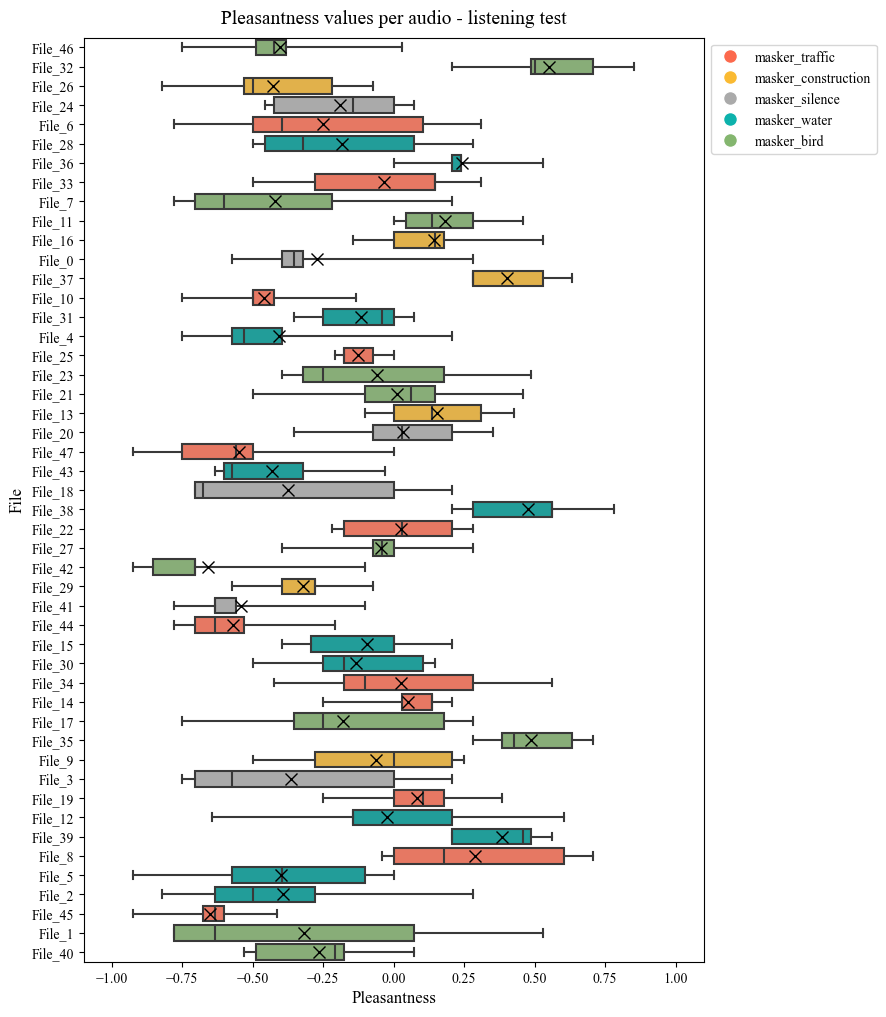

' # Calculate the 0th and 100th percentiles for each file\npercentiles = df.groupby("file")["P_ground_truth"].agg([lambda x: np.percentile(x, 0), lambda x: np.percentile(x, 100)])\n# Calculate the difference between the 100th and 0th percentiles for each file\npercentile_diff = percentiles.iloc[:, 1] - percentiles.iloc[:, 0]\n# Calculate the mean variance of all files\nmean_variance = percentile_diff.mean()\nprint("Mean variance(100-0) of all files:", mean_variance)\n\n# Calculate the 25th and 75th percentiles for each file\npercentiles = df.groupby("file")["P_ground_truth"].agg([lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75)])\n# Calculate the difference between the 100th and 0th percentiles for each file\npercentile_diff = percentiles.iloc[:, 1] - percentiles.iloc[:, 0]\n# Calculate the mean variance of all files\nmean_variance = percentile_diff.mean()\nprint("Mean variance(75-25) of all files:", mean_variance) '

In [5]:
# Create a list of colors for each file based on its predominant source
colors = [palette[source] for source in df_fold0.groupby("common_file")["Predominant sources"].first()]

files= df_sources["file"].unique()
plt.figure(figsize=(8, 12))
sns.boxplot(data=df_fold0, x="P_ground_truth", y="common_file", palette=colors, whis=[0, 100],showmeans=True, meanprops={"marker":"x", "markerfacecolor":"black", "markeredgecolor":"black", "markersize":8})
legend_labels = list(palette.keys())
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[label], markersize=10, label=label) for label in legend_labels]
plt.legend(handles=legend_handles, labels=legend_labels, loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Pleasantness values per audio - listening test", pad=10)
plt.xlabel('Pleasantness')
plt.ylabel('File')
plt.xlim(-1.1,1.1)
plt.show()

""" # Calculate the 0th and 100th percentiles for each file
percentiles = df.groupby("file")["P_ground_truth"].agg([lambda x: np.percentile(x, 0), lambda x: np.percentile(x, 100)])
# Calculate the difference between the 100th and 0th percentiles for each file
percentile_diff = percentiles.iloc[:, 1] - percentiles.iloc[:, 0]
# Calculate the mean variance of all files
mean_variance = percentile_diff.mean()
print("Mean variance(100-0) of all files:", mean_variance)

# Calculate the 25th and 75th percentiles for each file
percentiles = df.groupby("file")["P_ground_truth"].agg([lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75)])
# Calculate the difference between the 100th and 0th percentiles for each file
percentile_diff = percentiles.iloc[:, 1] - percentiles.iloc[:, 0]
# Calculate the mean variance of all files
mean_variance = percentile_diff.mean()
print("Mean variance(75-25) of all files:", mean_variance) """

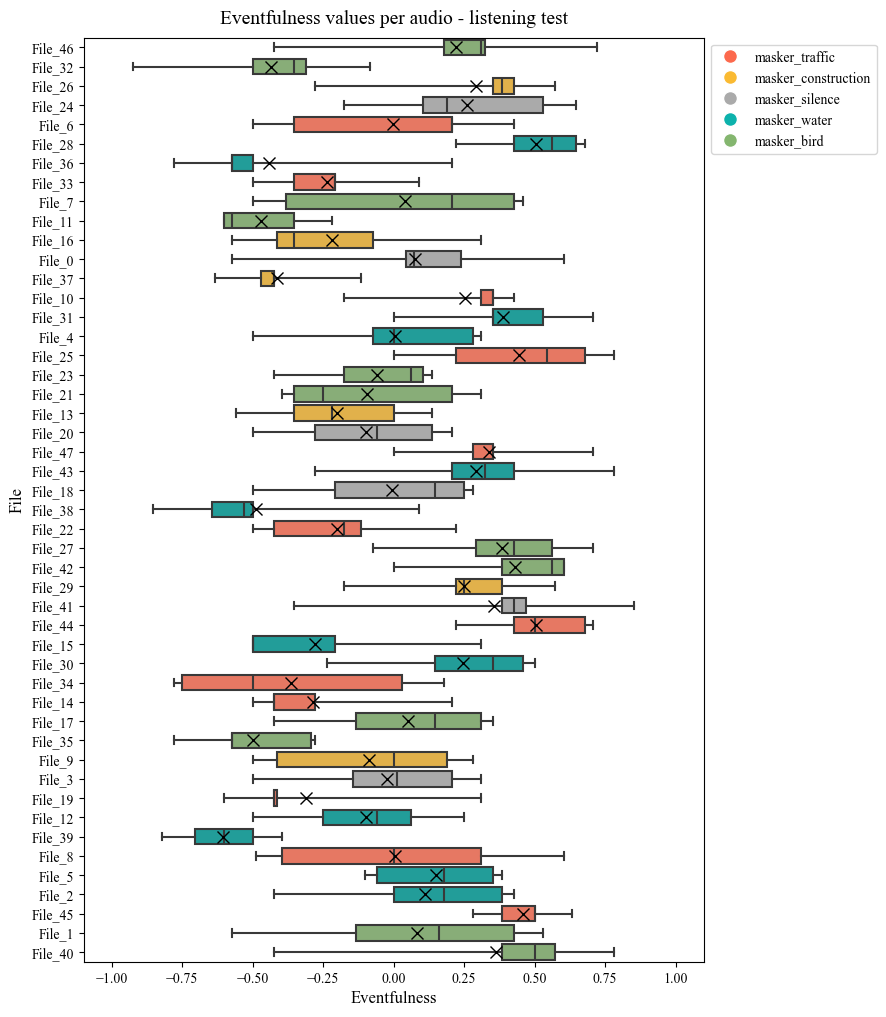

In [6]:
# Create a list of colors for each file based on its predominant source
colors = [palette[source] for source in df_fold0.groupby("common_file")["Predominant sources"].first()]

files= df_sources["file"].unique()
plt.figure(figsize=(8, 12))
sns.boxplot(data=df_fold0, x="E_ground_truth", y="common_file", palette=colors, whis=[0, 100],showmeans=True, meanprops={"marker":"x", "markerfacecolor":"black", "markeredgecolor":"black", "markersize":8})
legend_labels = list(palette.keys())
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[label], markersize=10, label=label) for label in legend_labels]
plt.legend(handles=legend_handles, labels=legend_labels, loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Eventfulness values per audio - listening test", pad=10)
plt.xlabel('Eventfulness')
plt.ylabel('File')
plt.xlim(-1.1,1.1)
plt.show()

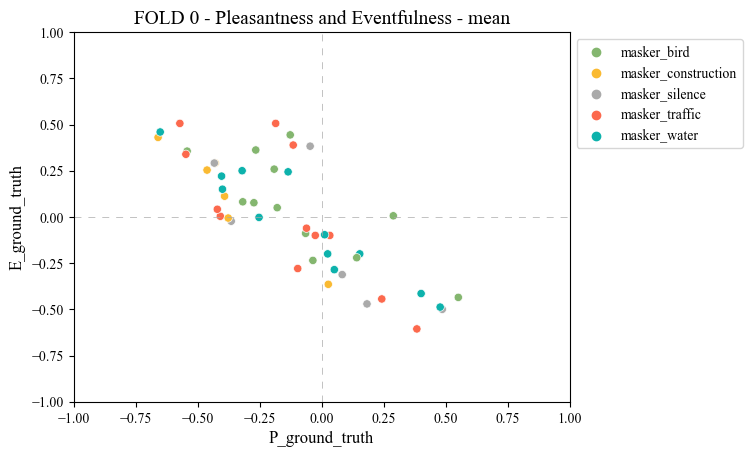

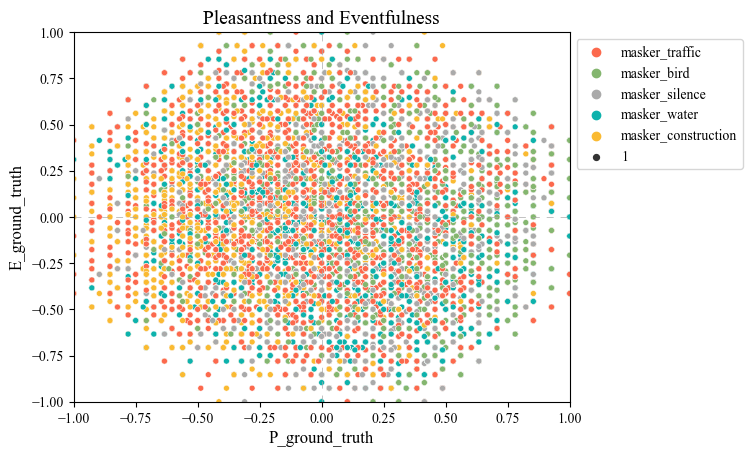

In [7]:

###### Scatter plot ######

sns.scatterplot(data=grouped_df_fold0, x="P_ground_truth", y="E_ground_truth", hue="Predominant sources", palette=palette)
# Center the axis lines at zero
plt.xlim(-1, 1)
plt.ylim(-1, 1)
# Draw axis lines like a cross in the middle
plt.axhline(0, color='#AAAAAA', linewidth=0.5,linestyle=(0, (10, 10)))
plt.axvline(0, color='#AAAAAA', linewidth=0.5,linestyle=(0, (10, 10)))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("FOLD 0 - Pleasantness and Eventfulness - mean")
# Show legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Scatter plot with different colors for each series
sns.scatterplot(data=df, x="P_ground_truth", y="E_ground_truth", hue="Predominant sources", palette=palette, size=1)
# Center the axis lines at zero
plt.xlim(-1, 1)
plt.ylim(-1, 1)
# Draw axis lines like a cross in the middle
plt.axhline(0, color='#AAAAAA', linewidth=0.5,linestyle=(0, (10, 10)))
plt.axvline(0, color='#AAAAAA', linewidth=0.5,linestyle=(0, (10, 10)))
plt.title("Pleasantness and Eventfulness")
# Show legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


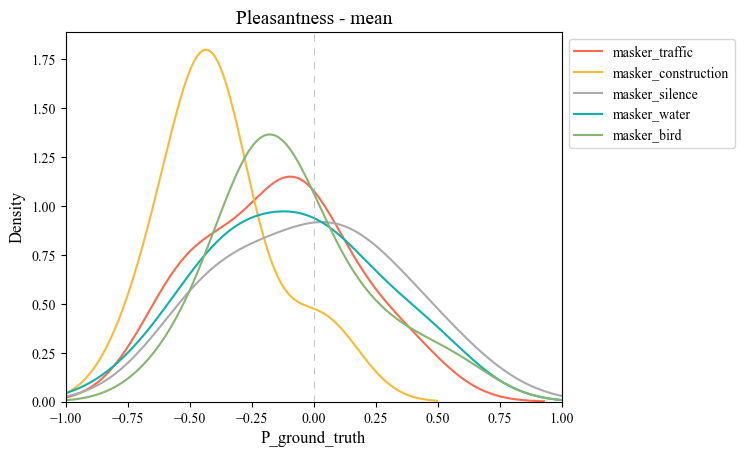

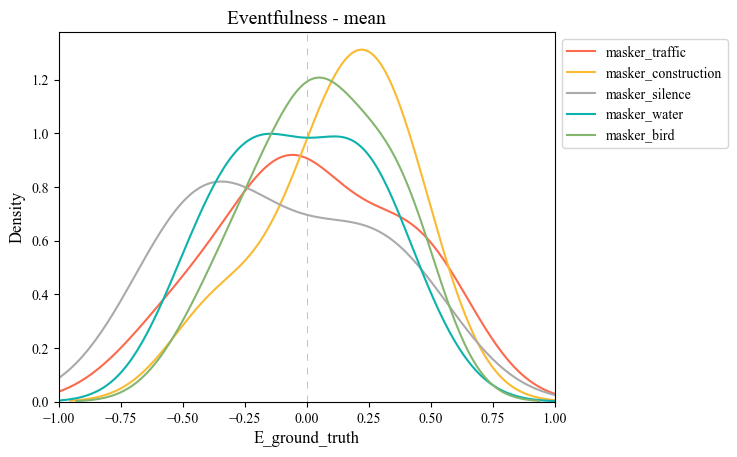

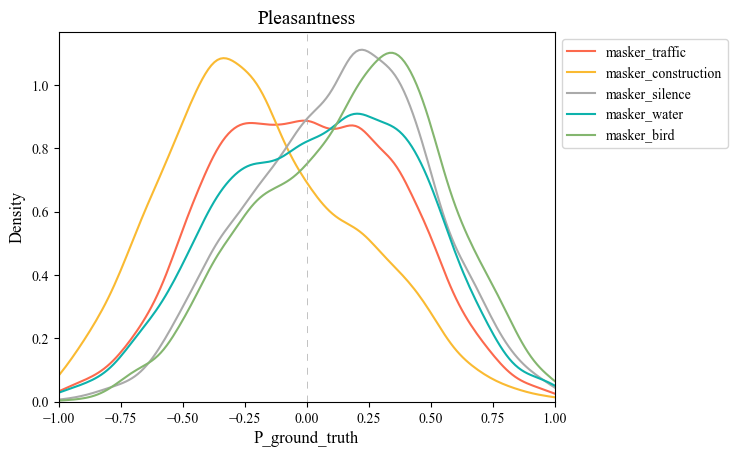

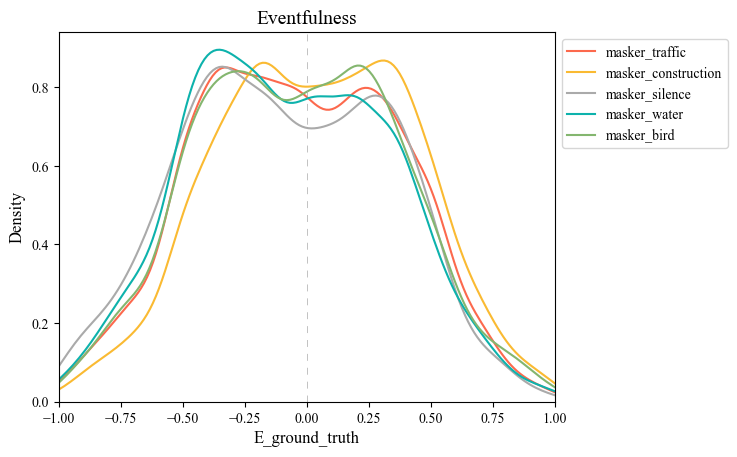

In [8]:

# KDE plots with different colors and series names
for source, color in palette.items():
    sns.kdeplot(grouped_df_fold0[grouped_df_fold0["Predominant sources"] == source]["P_ground_truth"], label=source, color=color)
# Draw axis lines like a cross in the middle
plt.axhline(0, color='#AAAAAA', linewidth=0.5,linestyle=(0, (10, 10)))
plt.axvline(0, color='#AAAAAA', linewidth=0.5,linestyle=(0, (10, 10)))
plt.title("Pleasantness - mean")
plt.xlim(-1,1)
# Show legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# KDE plots with different colors and series names
for source, color in palette.items():
    sns.kdeplot(grouped_df_fold0[grouped_df_fold0["Predominant sources"] == source]["E_ground_truth"], label=source, color=color)
# Draw axis lines like a cross in the middle
plt.axhline(0, color='#AAAAAA', linewidth=0.5,linestyle=(0, (10, 10)))
plt.axvline(0, color='#AAAAAA', linewidth=0.5, linestyle=(0, (10, 10)))
plt.title("Eventfulness - mean")
plt.xlim(-1,1)
# Show legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


# KDE plots with different colors and series names
for source, color in palette.items():
    sns.kdeplot(df[df["Predominant sources"] == source]["P_ground_truth"], label=source, color=color)
# Draw axis lines like a cross in the middle
plt.axhline(0, color='#AAAAAA', linewidth=0.5,linestyle=(0, (10, 10)))
plt.axvline(0, color='#AAAAAA', linewidth=0.5,linestyle=(0, (10, 10)))
plt.title("Pleasantness")
plt.xlim(-1,1)
# Show legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# KDE plots with different colors and series names
for source, color in palette.items():
    sns.kdeplot(df[df["Predominant sources"] == source]["E_ground_truth"], label=source, color=color)
# Draw axis lines like a cross in the middle
plt.axhline(0, color='#AAAAAA', linewidth=0.5,linestyle=(0, (10, 10)))
plt.axvline(0, color='#AAAAAA', linewidth=0.5,linestyle=(0, (10, 10)))
plt.title("Eventfulness")
plt.xlim(-1,1)
# Show legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


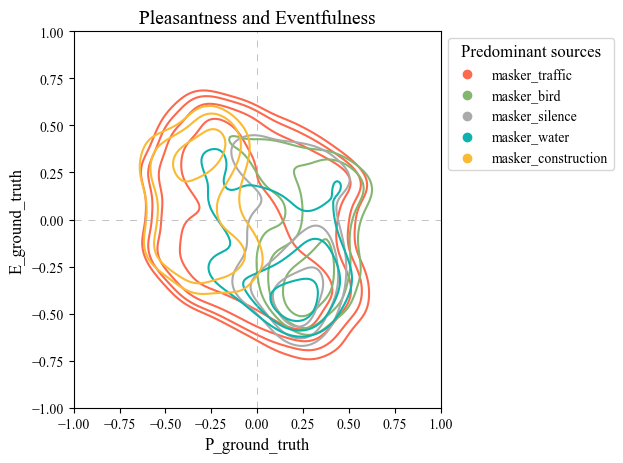

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a scatter plot to generate legend entries
sns.scatterplot(data=df, x="P_ground_truth", y="E_ground_truth", hue="Predominant sources", palette=palette, alpha=0) # I need this otherwise legend does not appear, if alpha > 0 then points are shown

sns.kdeplot(data=df, x="P_ground_truth", y="E_ground_truth", hue="Predominant sources", palette=palette, levels=5, thresh=0.5) # Plot i want to see

# Center the axis lines at zero
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Draw axis lines like a cross in the middle
plt.axhline(0, color='#AAAAAA', linewidth=0.5,linestyle=(0, (10, 10)))
plt.axvline(0, color='#AAAAAA', linewidth=0.5,linestyle=(0, (10, 10)))

plt.title("Pleasantness and Eventfulness")

# Show legend
plt.legend(title='Predominant sources', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()





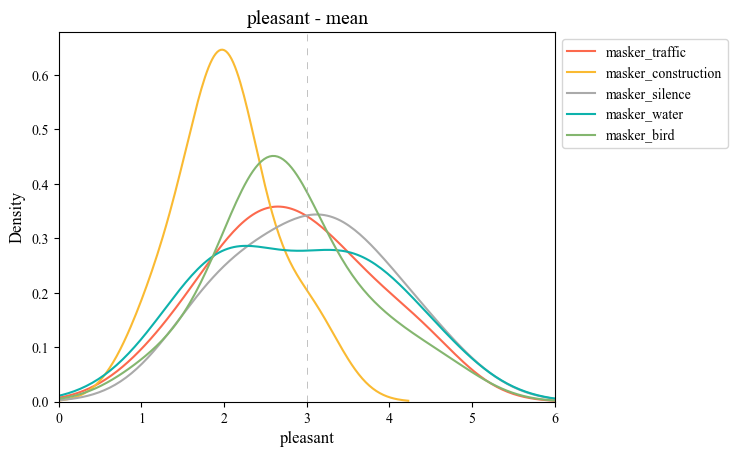

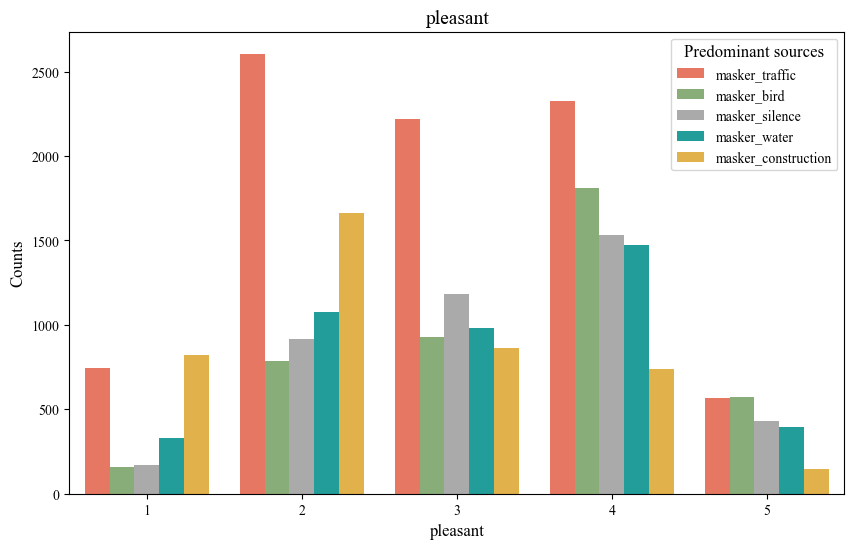

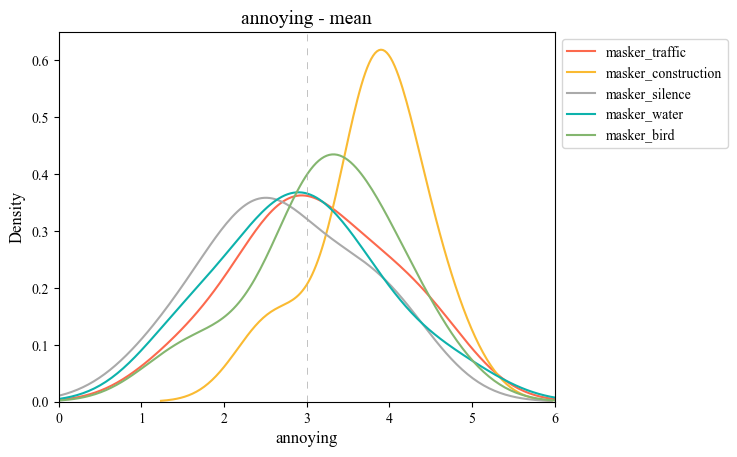

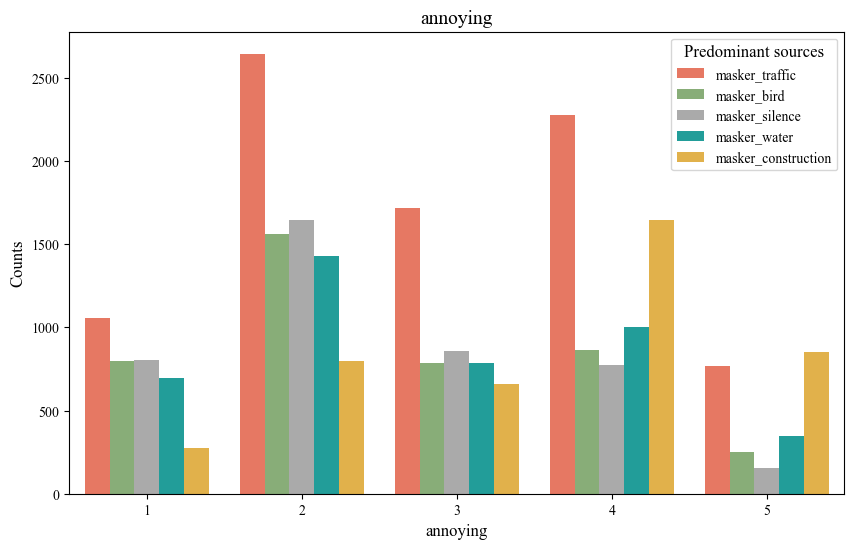

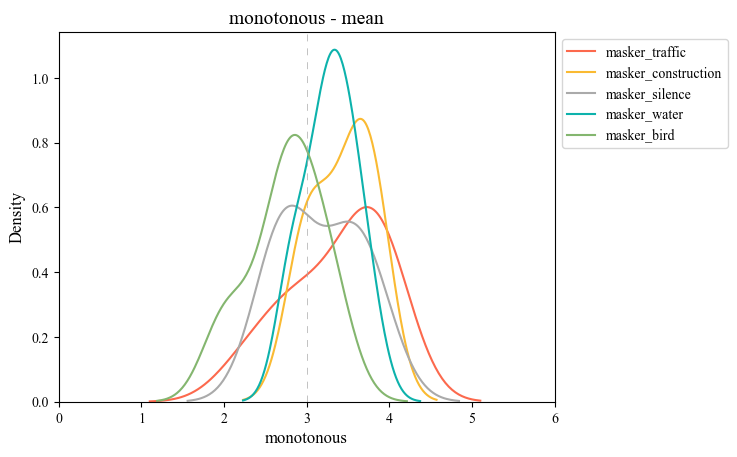

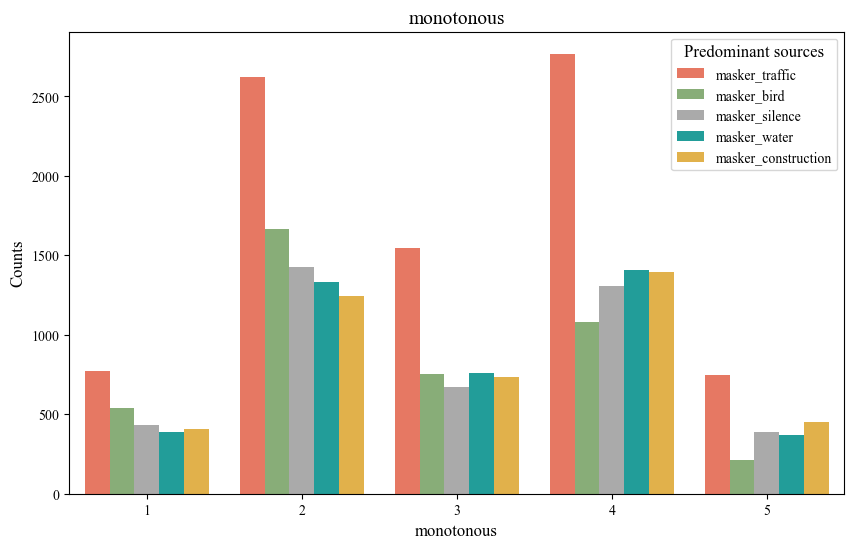

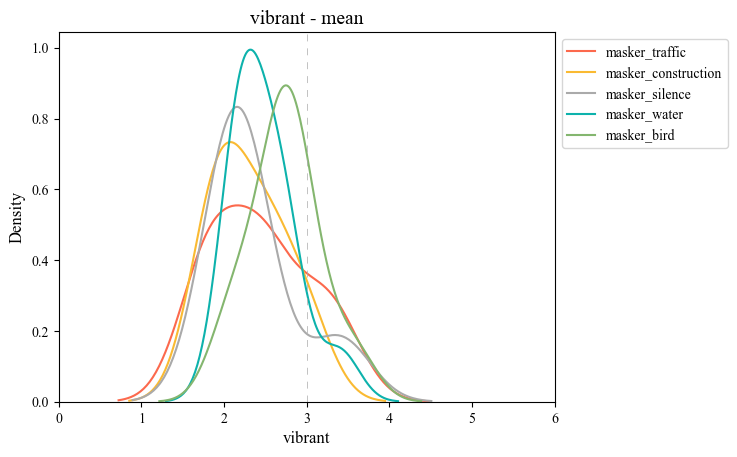

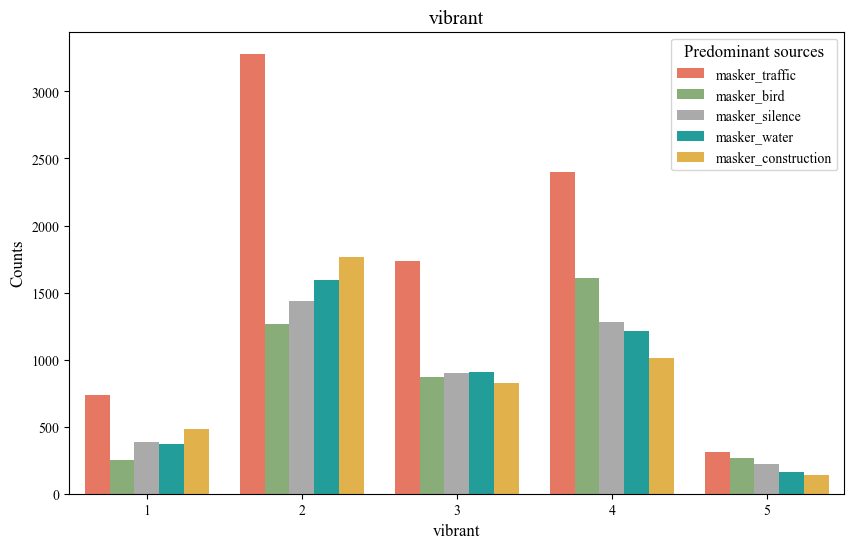

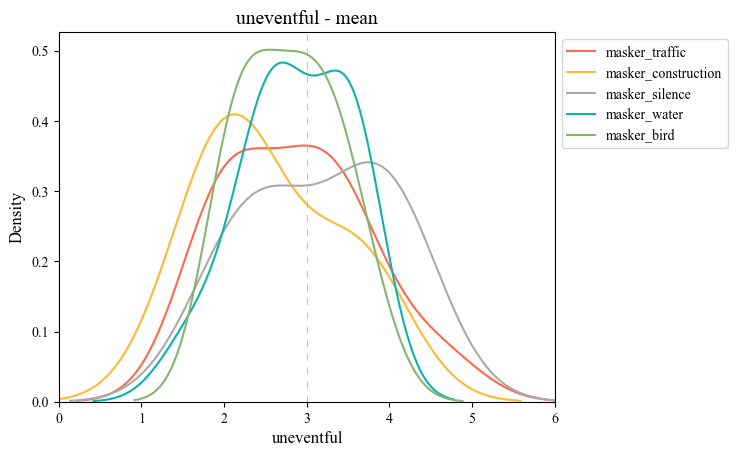

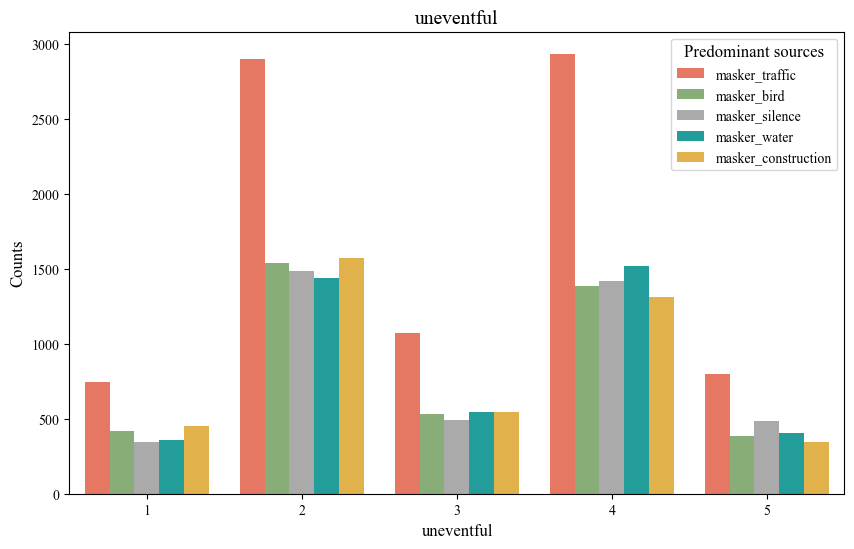

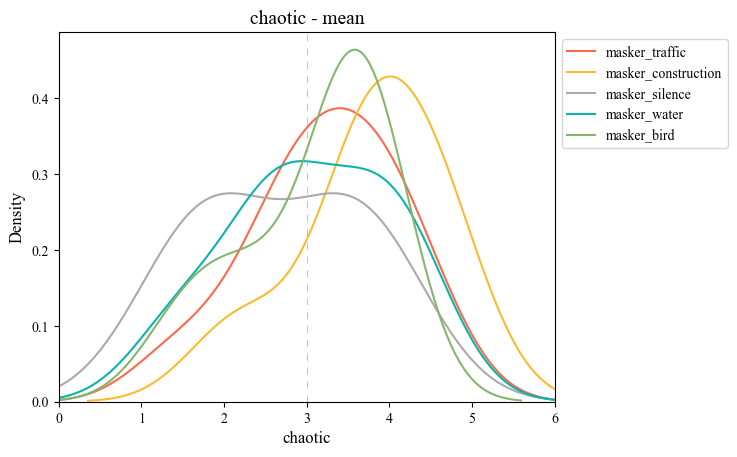

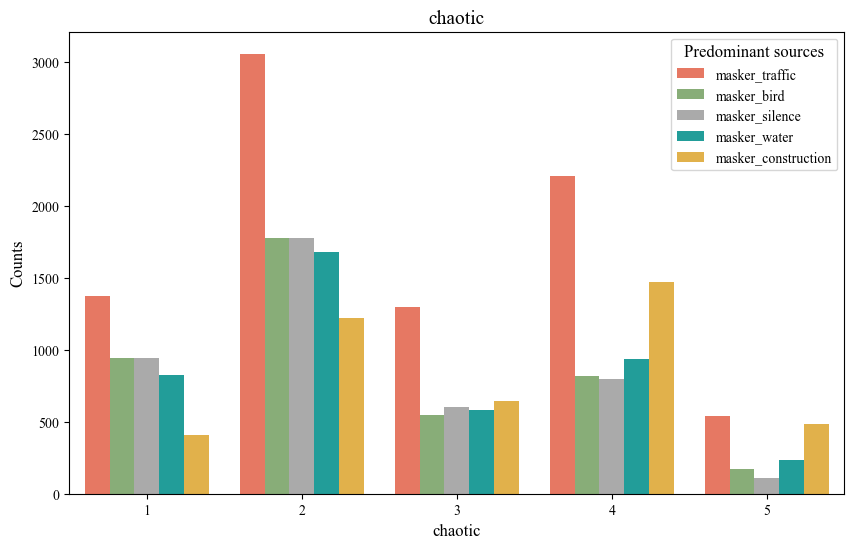

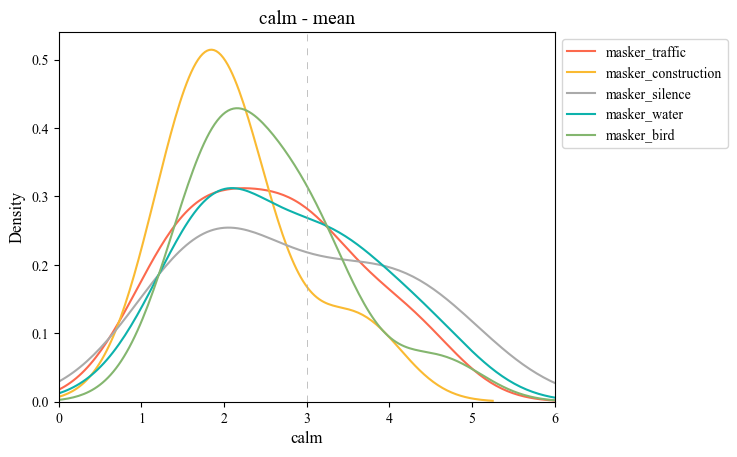

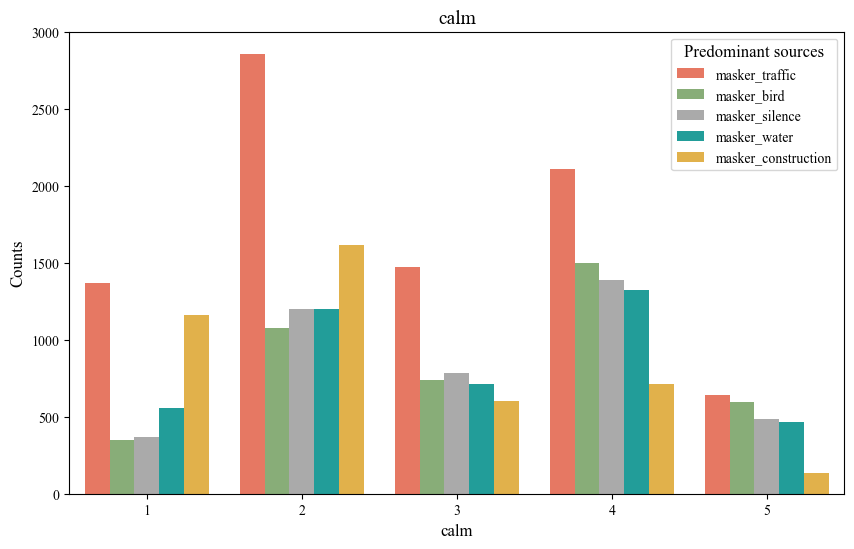

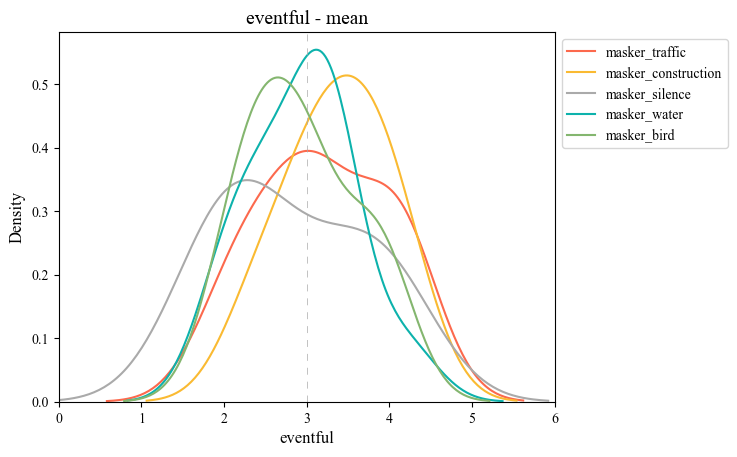

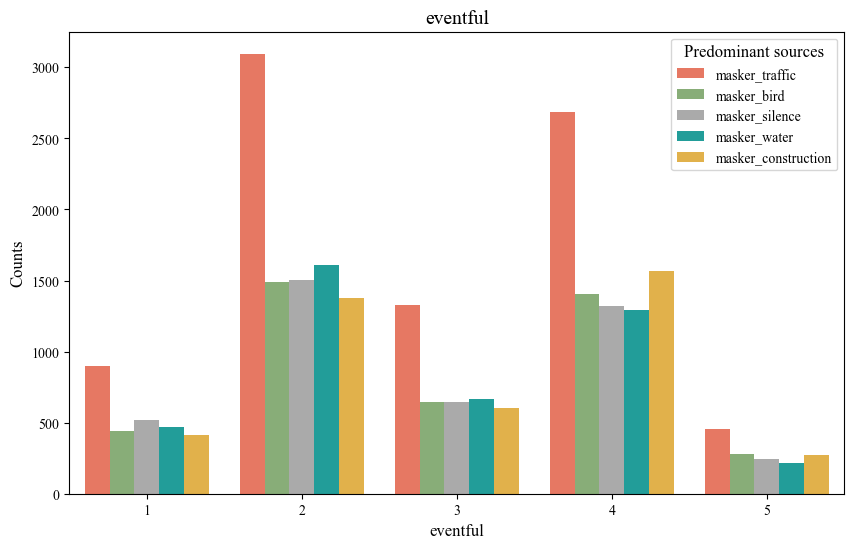

In [10]:
values={"calm", "vibrant", "pleasant", "eventful", "chaotic", "monotonous", "annoying", "uneventful"}

for value in values:
    # KDE plots with different colors and series names
    for source, color in palette.items():
        sns.kdeplot(grouped_df_fold0[grouped_df_fold0["Predominant sources"] == source][value], label=source, color=color)
    title=value+" - mean"
    plt.title(title)
    plt.xlim([0,6])
    plt.axvline(3, color='#AAAAAA', linewidth=0.5,linestyle=(0, (10, 10)))
    # Show legend
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
    # Create a count plot for each source
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=value, hue="Predominant sources", palette=palette, dodge=True)
    # Show legend
    plt.legend(title='Predominant sources')
    plt.xlabel(value)
    plt.ylabel('Counts')
    plt.title(value)
    plt.show()



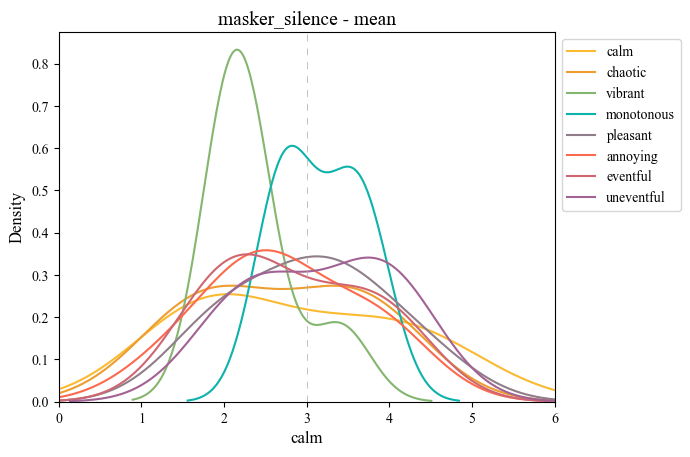

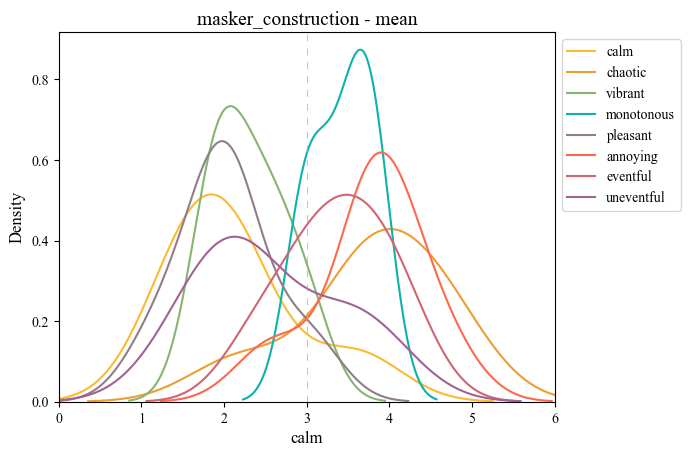

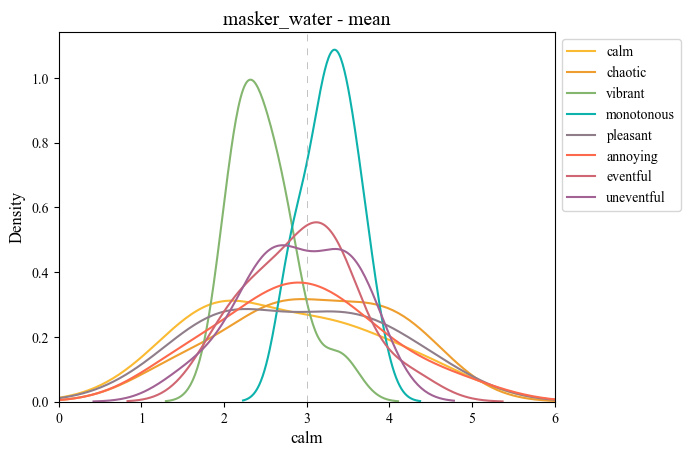

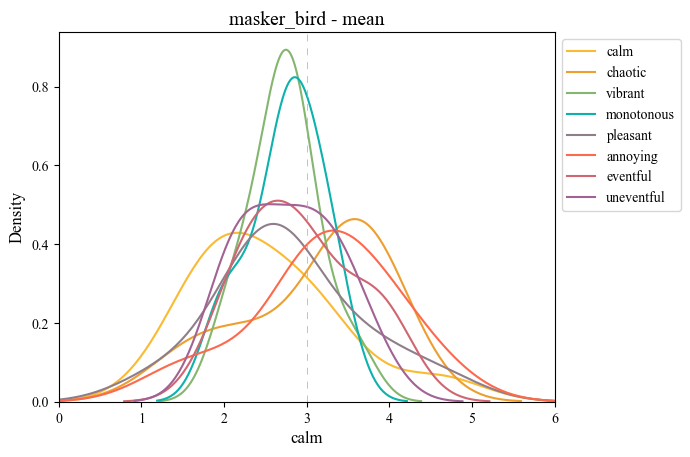

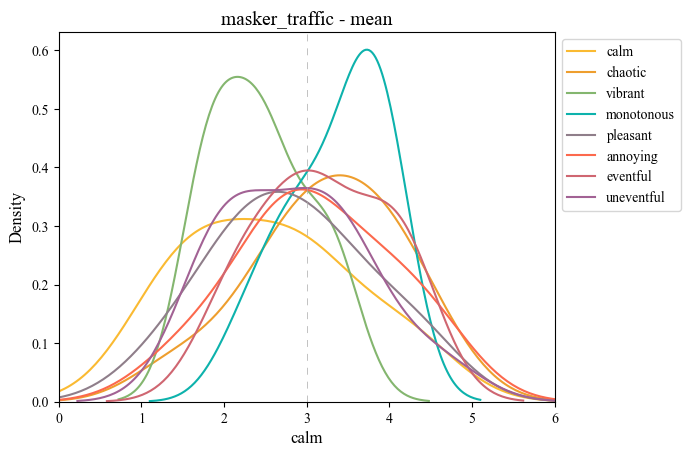

In [11]:
values_palette={"calm":"#FABA32","chaotic":"#EE9E2E", "vibrant":"#84B66F","monotonous":"#0DB2AC", "pleasant":"#8F7E8A","annoying":"#FC694D", "eventful":"#CF6671",   "uneventful":"#A26294"}
sources={
    "masker_traffic",
    "masker_construction",
    "masker_silence",
    "masker_bird",
    "masker_water"
}
for source in sources:
    # KDE plots with different colors and series names
    for value, color in values_palette.items():
        sns.kdeplot(grouped_df_fold0[grouped_df_fold0["Predominant sources"] == source][value], label=value, color=color)
    title=source+" - mean"
    plt.title(title)
    plt.axvline(3, color='#AAAAAA', linewidth=0.5,linestyle=(0, (10, 10)))
    plt.xlim([0,6])
    # Show legend
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

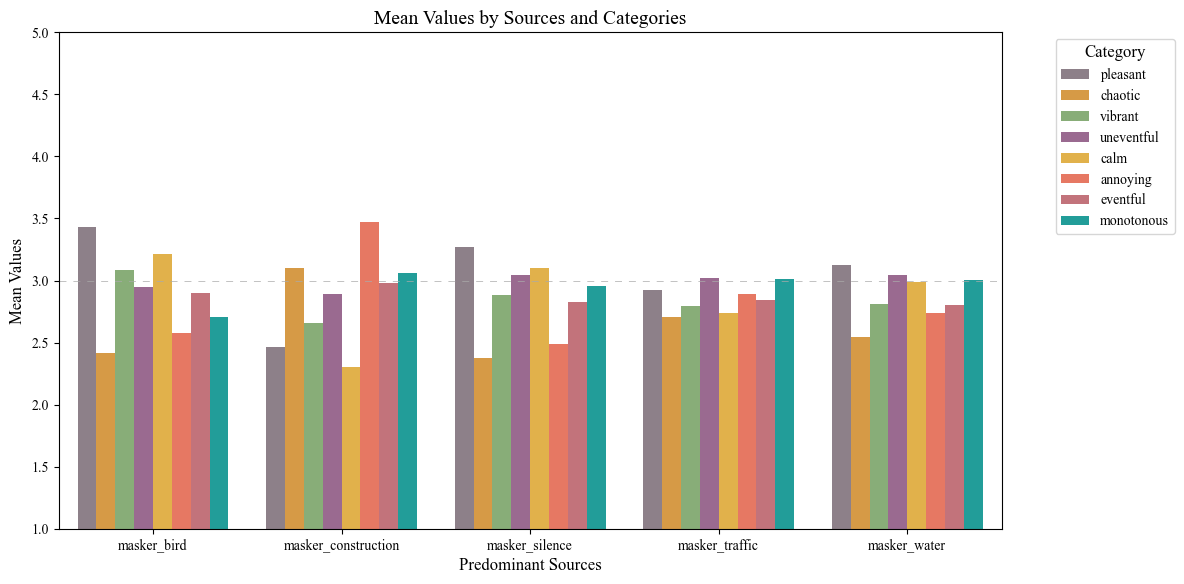

In [12]:
categories={"calm", "vibrant", "pleasant", "eventful", "chaotic", "monotonous", "annoying", "uneventful", "Predominant sources"}
# Group by 'Predominant sources' and sum the other columns
# Group by 'Predominant sources' and compute the mean
grouped_df = df[df["fold_r"]>=0].groupby("Predominant sources").mean().reset_index()

# Convert the DataFrame to long format
df_long = grouped_df.melt(id_vars=["Predominant sources"], 
                  value_vars=["pleasant", "chaotic", "vibrant", "uneventful", "calm", "annoying", "eventful", "monotonous"],
                  var_name="Category", value_name="Value")

# Set the figure size
plt.figure(figsize=(12, 6))
plt.axhline(3, color='#AAAAAA',linestyle=(0, (10, 10)),linewidth=0.5)
# Create the bar plot
sns.barplot(data=df_long, x="Predominant sources", y="Value", hue="Category", dodge=True, palette=values_palette)
plt.ylim(1, 5)
# Add legend
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')

# Set plot title and labels
plt.title("Mean Values by Sources and Categories")
plt.xlabel("Predominant Sources")
plt.ylabel("Mean Values")

# Show plot
plt.tight_layout()
plt.show()
